In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pylab as pylt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import itertools
import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.metrics import confusion_matrix

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/validation/validation/n4/n404.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n402.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n4010.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n406.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n416.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n4013.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n417.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n409.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n414.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n411.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n4011.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n407.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n405.jpg
/kaggle/input/10-monkey-species/validation/validation/n4/n410.jpg
/kaggle/input/10-monkey

In [2]:
# Create Traindf, validatedf
traindf=pd.DataFrame()
trainfilename=[]
trainlabels=[]
validationfilename=[]
vallabels=[]
valdf=pd.DataFrame()

# trainfilename=(' '.join(('/kaggle/input/10-monkey-species/training/training/'+dir+'/'+filename) for filename in os.listdir('/kaggle/input/10-monkey-species/training/training/'+dir) for dir in os.listdir('/kaggle/input/10-monkey-species/training/training/')))
# validationfilename=(' '.join(('/kaggle/input/10-monkey-species/validation/validation/'+dir+'/'+filename) for filename in os.listdir('/kaggle/input/10-monkey-species/validation/validation/'+dir) for dir in os.listdir('/kaggle/input/10-monkey-species/validation/validation/')))

for dir in os.listdir('/kaggle/input/10-monkey-species/training/training/'):
    for filename in os.listdir('/kaggle/input/10-monkey-species/training/training/'+dir):
        trainfilename.append('/kaggle/input/10-monkey-species/training/training/'+dir+'/'+filename)
        
for dir in os.listdir('/kaggle/input/10-monkey-species/validation/validation/'):
    for filename in os.listdir('/kaggle/input/10-monkey-species/validation/validation/'+dir):
        validationfilename.append('/kaggle/input/10-monkey-species/validation/validation/'+dir+'/'+filename)

for filename in (trainfilename):
    label = filename.split('/')[-2]
    trainlabels.append(label)
    
for filename in (validationfilename):
    label = filename.split('/')[-2]
    vallabels.append(label)  
    

traindf=pd.DataFrame({
    'images': trainfilename,
    'labels':trainlabels
})

valdf=pd.DataFrame({
    'images': validationfilename,
    'labels':vallabels
})

# Converting labels to number
labels={'n0':0,'n1':1,'n2':2,'n3':3,'n4':4,'n5':5,'n6':6,'n7':7,'n8':8,'n9':9}
traindf['num_labels']=traindf['labels'].map(labels)
valdf['num_labels']=valdf['labels'].map(labels)


traindf.head()
valdf.head()

,images,labels,num_labels
0,/kaggle/input/10-monkey-species/validation/val...,n4,4
1,/kaggle/input/10-monkey-species/validation/val...,n4,4
2,/kaggle/input/10-monkey-species/validation/val...,n4,4
3,/kaggle/input/10-monkey-species/validation/val...,n4,4
4,/kaggle/input/10-monkey-species/validation/val...,n4,4


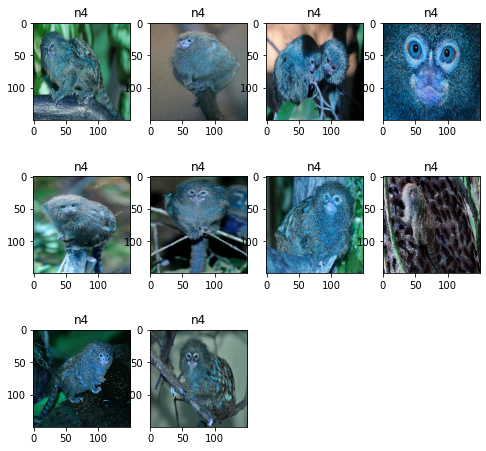

In [3]:
# Display some images from traindf
f=plt.figure(figsize=(8, 8))
cnt=1
for i in traindf[0:10]['images']:
    img=cv2.imread(i)
    img=cv2.resize(img, (150,150))    
    f.add_subplot(3, 4, cnt)
    plt.title(i.split('/')[-2])
    plt.imshow(img)
    cnt=cnt+1
plt.show()

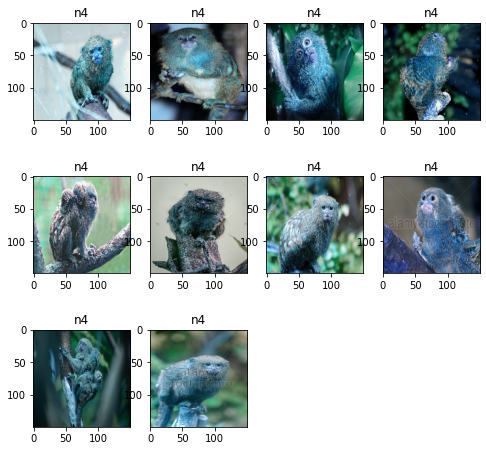

In [4]:
# Display some images from valdf
f=plt.figure(figsize=(8, 8))
cnt=1
for i in valdf[0:10]['images']:
    img=cv2.imread(i)
    img=cv2.resize(img, (150,150))    
    f.add_subplot(3, 4, cnt)
    plt.title(i.split('/')[-2])
    plt.imshow(img)
    cnt=cnt+1
plt.show()

In [11]:
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.models import Model
from keras import optimizers
import random as rn
import tensorflow as tf
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization,GlobalMaxPooling2D

import keras
from keras.models import Sequential
from keras.optimizers import adadelta, adagrad, adam, adamax, RMSprop
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

pre_trained_model = vgg16.VGG16(input_shape=(224,224,3), include_top=False, weights="imagenet",pooling="max")

for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False

pre_trained_model.summary()

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [12]:
# Although this part can be done also with the functional API, I found that for this simple models, this becomes more intuitive
transfer_model = Sequential()
for layer in pre_trained_model.layers:
    transfer_model.add(layer)
transfer_model.add(Dense(512, activation="relu"))  # Very important to use relu as activation function, search for "vanishing gradiends" :)
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation="softmax")) # Finally our activation layer! we use 10 outputs as we have 10 monkey species (labels)    

callback=EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=5)
reduce=ReduceLROnPlateau(monitor='val_accuracy', patience=2,verbose=1,factor=0.2)
es=[callback,reduce]

transfer_model .summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [13]:
# augmentation settings, for now just normalizing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

# not doing any data augmentation on validation test set
valid_datagen  = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255.)

# creating train and valid generators (not using valid_split to avoid doing data augmentation on validation set)
train_generator = train_datagen.flow_from_dataframe(
    traindf, 
    x_col='images',
    y_col='labels',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32   
)

valid_generator = valid_datagen.flow_from_dataframe(
    valdf, 
    x_col='images',
    y_col='labels',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 1098 validated image filenames belonging to 10 classes.
Found 272 validated image filenames belonging to 10 classes.


In [15]:
TrainSize=traindf.shape[0]
ValSize=valdf.shape[0]
VALID_FRACTION=0.2
BATCH_SIZE=32
EPOCHS=50

# training
adam = optimizers.Adam(lr=0.0001)

transfer_model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = transfer_model.fit_generator(train_generator,
    validation_data=valid_generator,
    steps_per_epoch=(TrainSize//BATCH_SIZE),
    validation_steps=(ValSize//BATCH_SIZE),
    epochs=EPOCHS,
    callbacks=es,
    verbose=1,shuffle=True)

Epoch 1/50
34/34 [==============================] - 451s 13s/step - loss: 2.1973 - accuracy: 0.2251 - val_loss: 1.4912 - val_accuracy: 0.6719
Epoch 2/50
34/34 [==============================] - 457s 13s/step - loss: 1.2843 - accuracy: 0.5741 - val_loss: 0.6076 - val_accuracy: 0.8583
Epoch 3/50
34/34 [==============================] - 438s 13s/step - loss: 0.6128 - accuracy: 0.7964 - val_loss: 0.2525 - val_accuracy: 0.9250
Epoch 4/50
34/34 [==============================] - 457s 13s/step - loss: 0.4254 - accuracy: 0.8695 - val_loss: 0.1944 - val_accuracy: 0.8917
Epoch 5/50
34/34 [==============================] - 433s 13s/step - loss: 0.3232 - accuracy: 0.8841 - val_loss: 0.0904 - val_accuracy: 0.9167

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 6/50
34/34 [==============================] - 453s 13s/step - loss: 0.2615 - accuracy: 0.9287 - val_loss: 0.2475 - val_accuracy: 0.9375
Epoch 7/50
34/34 [==============================] - 436s 13s/step 

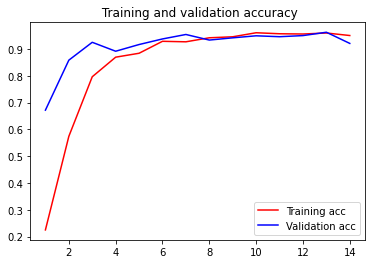

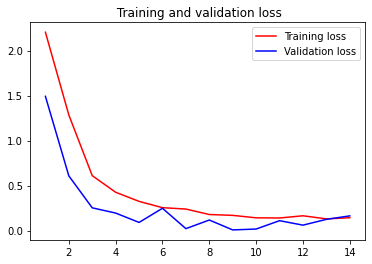

In [27]:
# Display acc, val_acc
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title(' Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title(' Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

Label 150    n1
Name: labels, dtype: object
Prediction [1]
Prediction1 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


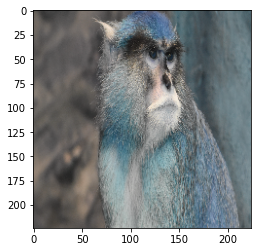

In [29]:
# For Test Images
for i in valdf.images[150:151]:
    print('Label', valdf['labels'][150:151])
    test_image=cv2.imread(i)
    test_image=cv2.resize(test_image, (224,224))
    test_image=np.array(test_image)
    plt.imshow(test_image)
    test_image=np.expand_dims(test_image, axis=0)

# # zero centered images
# test_image = test_image/test_image.max()

predictions = history.model.predict_classes(test_image)
predictions1 = history.model.predict(test_image)

print('Prediction', predictions)
print('Prediction1', predictions1)